# Imports & Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from pathlib import Path
from time import time
from collections import deque
from random import sample
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [3]:
sns.set_style('whitegrid')

# Set up results directory
results_path = Path('results', 'trading_bot')
if not results_path.exists():
    results_path.mkdir(parents=True)


### Helper functions
def format_time(t):
    m_, s = divmod(t, 60)
    h, m = divmod(m_, 60)
    return '{:02.0f}:{:02.0f}:{:02.0f}'.format(h, m, s)

# Visualization

## SPDR S&P 500 ETF Trust

### Get Results

In [4]:
# Compile results

file_list = [
             'results/trading_bot/SPY_Train_Model1.csv',
             'results/trading_bot/SPY_Train_Model2.csv',
             'results/trading_bot/SPY_Train_Model3.csv',
             'results/trading_bot/SPY_Train_Model4.csv',
             'results/trading_bot/SPY_Train_Model5.csv',
             'results/trading_bot/SPY_Train_Model6.csv'
            ]

test_file_list = [
                  'results/trading_bot/SimpleNoCost_Test.csv',
                  'results/trading_bot/SPY_Test_Model2.csv',
                  'results/trading_bot/SPY_Test_Model3.csv',
                  'results/trading_bot/SPY_Test_Model4.csv',
                  'results/trading_bot/SPY_Test_Model5.csv',
                  'results/trading_bot/SPY_Test_Model6.csv'
                 ]

results_list = [pd.read_csv(file) for file in file_list]
test_results_list = [pd.read_csv(file) for file in test_file_list]

local_files = [file.split('/')[-1] for file in file_list]
test_local_files = [file.split('/')[-1] for file in test_file_list]

labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Test Market']

### Plot Results

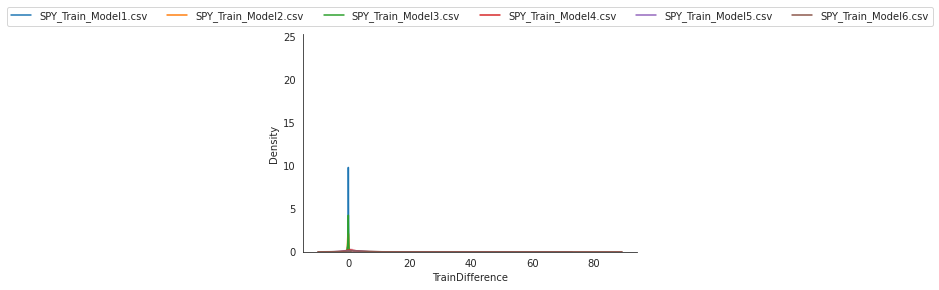

In [5]:
# Plot density histogram
with sns.axes_style('white'):
    for results in results_list:
        sns.distplot(results.TrainDifference)
        sns.despine()

# Put legend above graph
plt.legend(local_files, loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=len(file_list))

#### Training Data

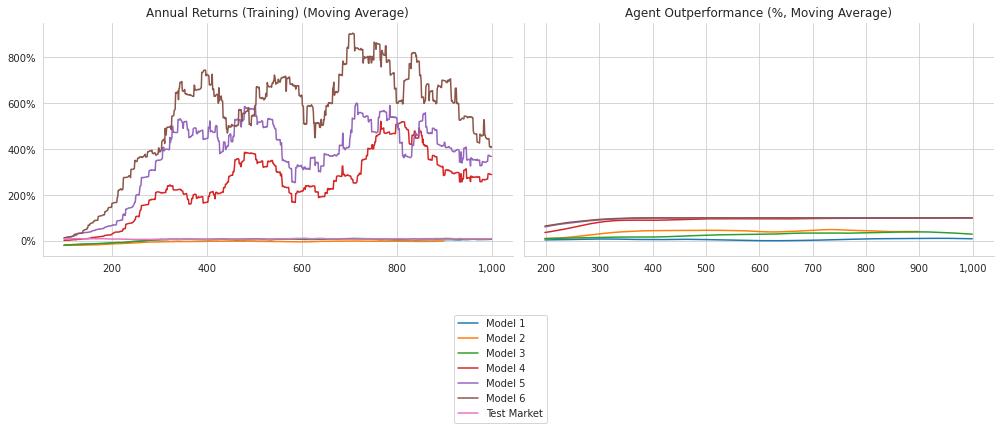

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)

for r in range(0, len(results_list)):
    results = results_list[r]
    data = results['TrainAgent']
    
    if r == len(results_list) - 1:
        data = results[['TrainAgent','TrainMarket']]
    
    df = (data
          .sub(1)
          .rolling(100)
          .mean())
    df.plot(ax=axes[0],
            title='Annual Returns (Training) (Moving Average)',
            legend='')

#plt.legend(local_files)

for r in range(0, len(results_list)):
    results = results_list[r]
    
    df2 = (results['Strategy Wins (%)']
           .div(100)
           .rolling(100) # Note: Rolling 100 may not be the common rolling value
           .mean())
    
    df2.plot(ax=axes[1],
             title='Agent Outperformance (%, Moving Average)')
    
#fig.legend(labels=local_files + ['TrainMarket'], bbox_to_anchor=(0.27, -0.5), loc='lower center')
fig.legend(labels=labels, bbox_to_anchor=(0.5, -0.5), loc='lower center')

for ax in axes:
    ax.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
#axes[1].axhline(.5, ls='--', c='k', lw=1)

sns.despine()
fig.tight_layout()
#fig.savefig(results_path / 'performance', dpi=300)

#### Testing Data

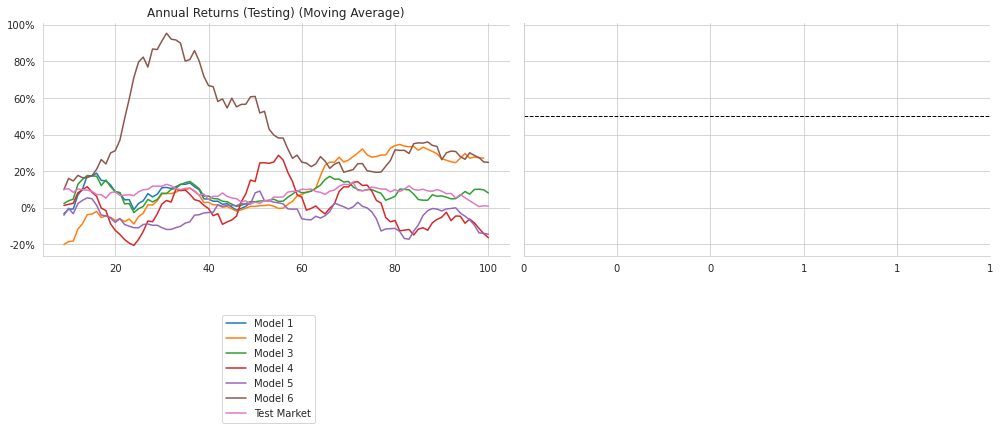

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)

for r in range(0, len(test_results_list)):
    results = test_results_list[r]
    data = results['TestAgent']
    
    if r == len(test_results_list) - 1:
        data = results[['TestAgent','TestMarket']]
    
    df = (data
          .sub(1)
          .rolling(10)
          .mean())
    df.plot(ax=axes[0],
            title='Annual Returns (Testing) (Moving Average)',
            legend='')
    
#fig.legend(labels=test_local_files + ['TestMarket'], bbox_to_anchor=(0.27, -0.5), loc='lower center')
fig.legend(labels=labels, bbox_to_anchor=(0.27, -0.5), loc='lower center')


for ax in axes:
    ax.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
axes[1].axhline(.5, ls='--', c='k', lw=1)

sns.despine()
fig.tight_layout()
#fig.savefig(results_path / 'performance', dpi=300)




#### Action Frequency (Training Data)

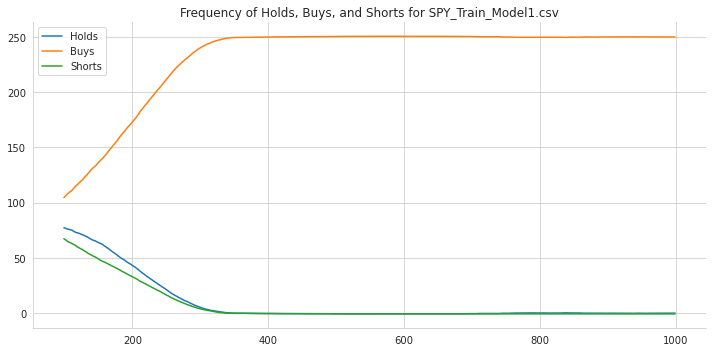

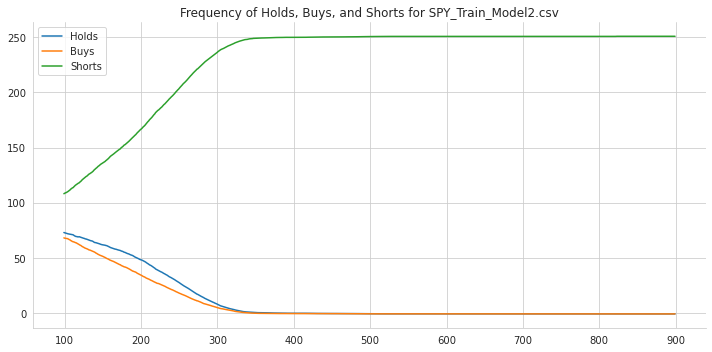

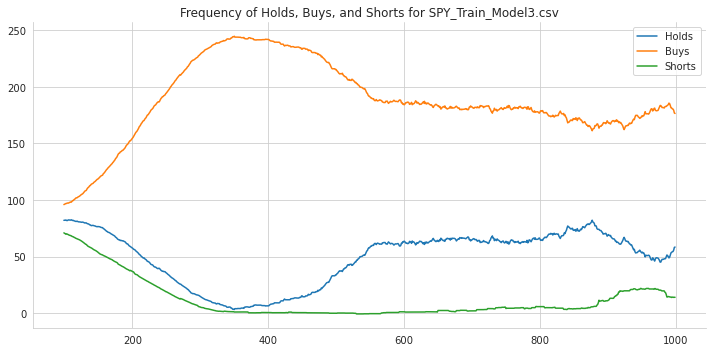

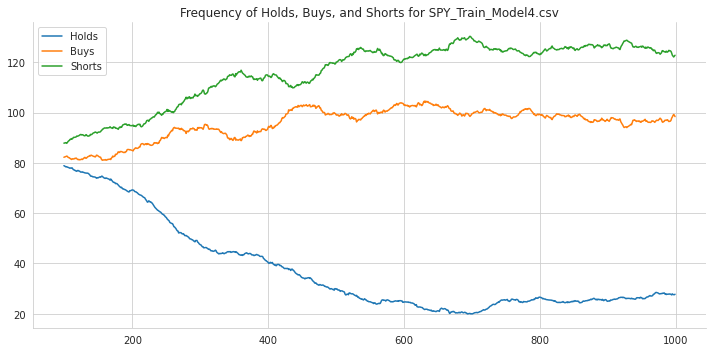

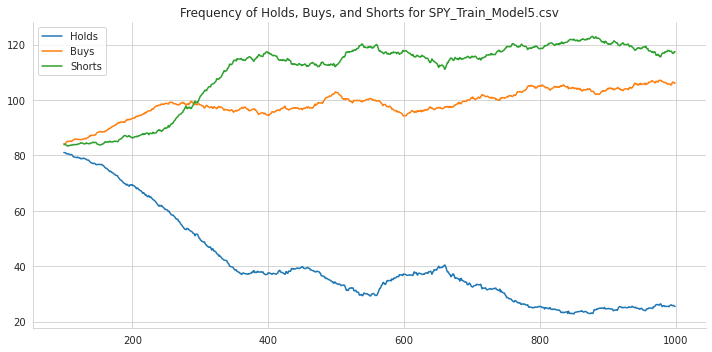

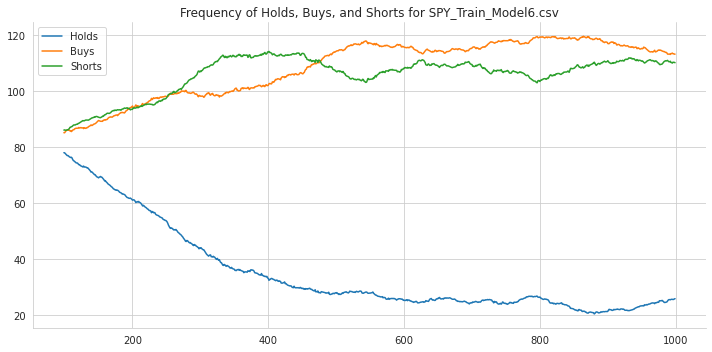

In [8]:
for r in range(0, len(results_list)):
    fig, axes = plt.subplots(ncols=1, figsize=(10, 5), sharey=True)
    targets = ['Holds', 'Buys', 'Shorts']
    results = results_list[r]
    try:
        data = results[targets]
    except:
        data = results[['holds', 'Buys', 'shorts']] # TODO: Just change them if they don't conform
    
    df = (data
          .sub(1)
          .rolling(100)
          .mean())
    
    df.plot(ax=axes,title='Frequency of Holds, Buys, and Shorts for ' + local_files[r])
    
    sns.despine()
    fig.tight_layout()

## Foreign Exchange

### Get Results

In [9]:
file_list = [
             'results/trading_bot/FX_Train_Model1.csv',
             'results/trading_bot/FX_Train_Model2.csv',
             'results/trading_bot/FX_Train_Model3.csv',
             'results/trading_bot/FX_Train_Model4.csv',
             'results/trading_bot/FX_Train_Model5.csv',
             'results/trading_bot/FX_Train_Model6.csv'
            ]

test_file_list = [
                  'results/trading_bot/FX_Test_Model1.csv',
                  'results/trading_bot/FX_Test_Model2.csv',
                  'results/trading_bot/FX_Test_Model3.csv',
                  'results/trading_bot/FX_Test_Model4.csv',
                  'results/trading_bot/FX_Test_Model5.csv',
                  'results/trading_bot/FX_Test_Model6.csv'
                 ]

results_list = [pd.read_csv(file) for file in file_list]
test_results_list = [pd.read_csv(file) for file in test_file_list]

local_files = [file.split('/')[-1] for file in file_list]
test_local_files = [file.split('/')[-1] for file in test_file_list]

labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Test Market']

### Plot Results

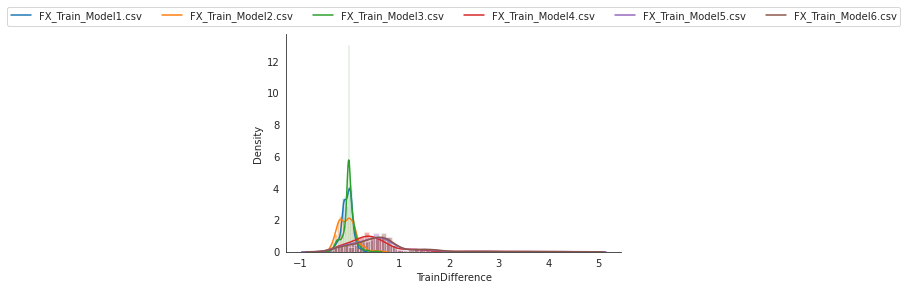

In [10]:
# Plot density histogram
with sns.axes_style('white'):
    for results in results_list:
        sns.distplot(results.TrainDifference)
        sns.despine()

# Put legend above graph
plt.legend(local_files, loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=len(file_list))

#### Training Data

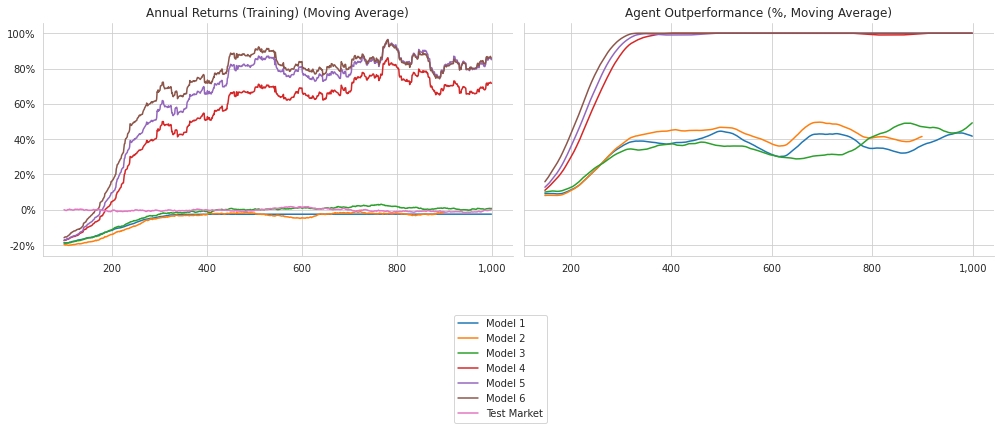

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)

for r in range(0, len(results_list)):
    results = results_list[r]
    data = results['TrainAgent']
    
    if r == len(results_list) - 1:
        data = results[['TrainAgent','TrainMarket']]
    
    df = (data
          .sub(1)
          .rolling(100)
          .mean())
    df.plot(ax=axes[0],
            title='Annual Returns (Training) (Moving Average)',
            legend='')

#plt.legend(local_files)

for r in range(0, len(results_list)):
    results = results_list[r]
    
    df2 = (results['Strategy Wins (%)']
           .div(100)
           .rolling(50)
           .mean())
    
    df2.plot(ax=axes[1],
             title='Agent Outperformance (%, Moving Average)')
    
#fig.legend(labels=local_files + ['TrainMarket'], bbox_to_anchor=(0.27, -0.5), loc='lower center')
fig.legend(labels=labels, bbox_to_anchor=(0.5, -0.5), loc='lower center')

for ax in axes:
    ax.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
#axes[1].axhline(.5, ls='--', c='k', lw=1)

sns.despine()
fig.tight_layout()
#fig.savefig(results_path / 'performance', dpi=300)

#### Testing Data

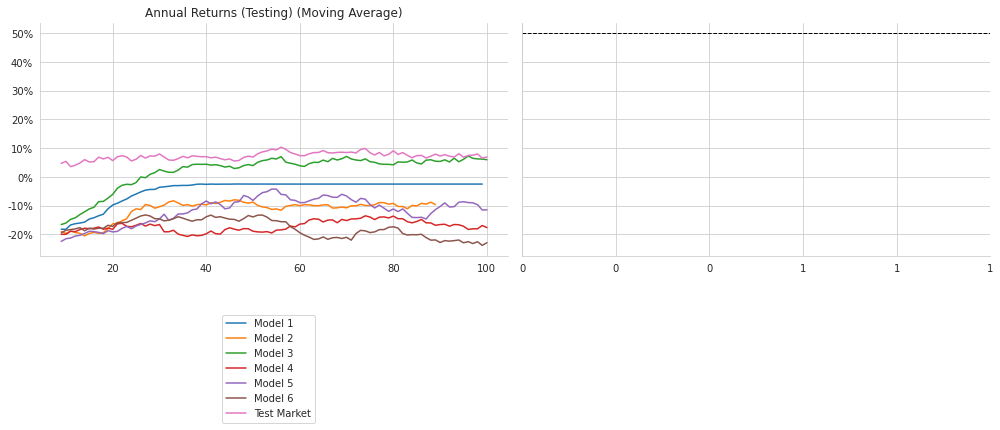

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)

for r in range(0, len(test_results_list)):
    results = test_results_list[r]
    data = results['TestAgent']
    
    if r == len(test_results_list) - 1:
        data = results[['TestAgent','TestMarket']]
    
    df = (data
          .sub(1)
          .rolling(10)
          .mean())
    df.plot(ax=axes[0],
            title='Annual Returns (Testing) (Moving Average)',
            legend='')
    
#fig.legend(labels=test_local_files + ['TestMarket'], bbox_to_anchor=(0.27, -0.5), loc='lower center')
fig.legend(labels=labels, bbox_to_anchor=(0.27, -0.5), loc='lower center')


for ax in axes:
    ax.yaxis.set_major_formatter(
        FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.xaxis.set_major_formatter(
        FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
axes[1].axhline(.5, ls='--', c='k', lw=1)

sns.despine()
fig.tight_layout()
#fig.savefig(results_path / 'performance', dpi=300)




#### Action Frequency (Training Data)

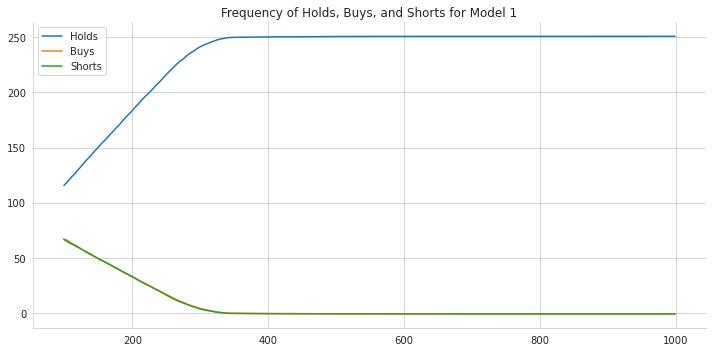

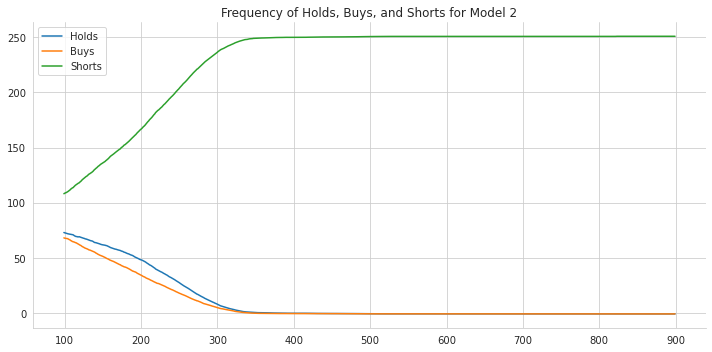

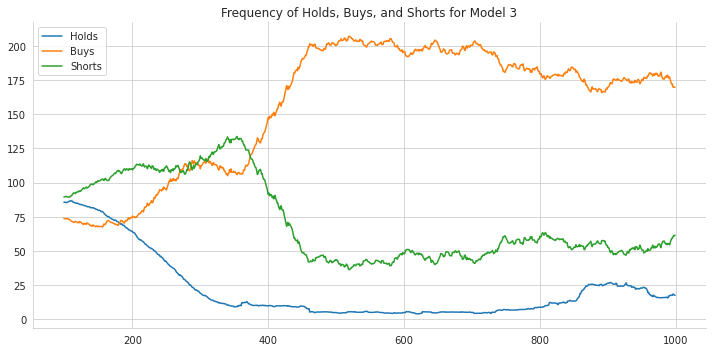

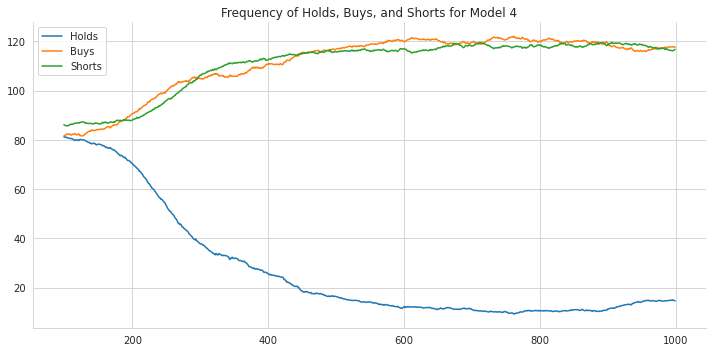

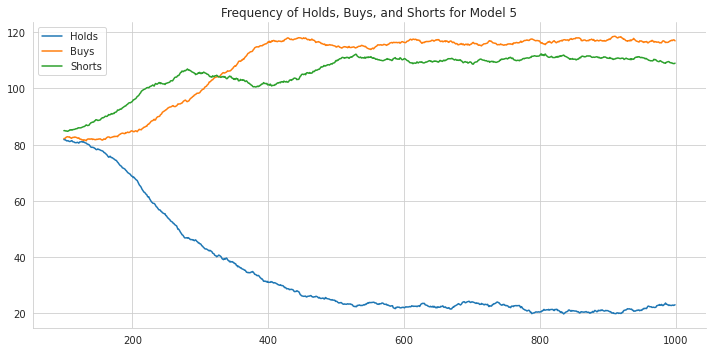

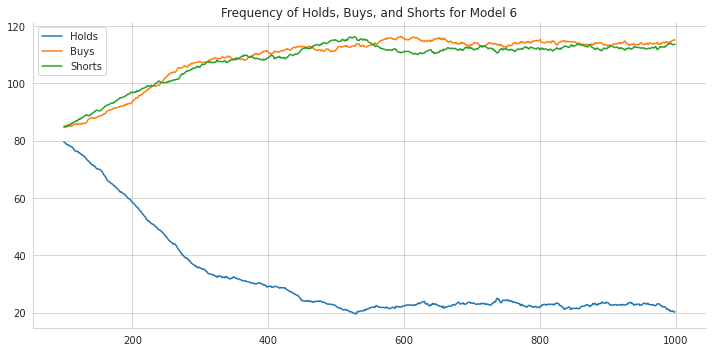

In [13]:
for r in range(0, len(results_list)):
    fig, axes = plt.subplots(ncols=1, figsize=(10, 5), sharey=True)
    targets = ['Holds', 'Buys', 'Shorts']
    results = results_list[r]
    try:
        data = results[targets]
    except:
        data = results[['holds', 'Buys', 'shorts']] # TODO: Just change them if they don't conform
    
    df = (data
          .sub(1)
          .rolling(100)
          .mean())
    
    df.plot(ax=axes,title='Frequency of Holds, Buys, and Shorts for ' + labels[r])
    
    sns.despine()
    fig.tight_layout()